In [ ]:
import zipfile
import os
import shutil
import tensorflow as tf
from tensorflow import keras

In [ ]:
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/TFG - Reconocimiento de ingredientes mediante multilabel learning/Food101.zip', 'r')

In [ ]:
zip_ref.extractall('/content/Food101')

In [ ]:
shutil.move('/content/Food101/Food101/food-101', '/content/Food101/food-101')

'/content/Food101/food-101'

In [ ]:
shutil.rmtree('/content/Food101/Food101')

In [ ]:
!ls /content/Food101/food-101

images	license_agreement.txt  meta  README.txt


In [ ]:
!ls /content/Food101/food-101/images

apple_pie	    eggs_benedict	     onion_rings
baby_back_ribs	    escargots		     oysters
baklava		    falafel		     pad_thai
beef_carpaccio	    filet_mignon	     paella
beef_tartare	    fish_and_chips	     pancakes
beet_salad	    foie_gras		     panna_cotta
beignets	    french_fries	     peking_duck
bibimbap	    french_onion_soup	     pho
bread_pudding	    french_toast	     pizza
breakfast_burrito   fried_calamari	     pork_chop
bruschetta	    fried_rice		     poutine
caesar_salad	    frozen_yogurt	     prime_rib
cannoli		    garlic_bread	     pulled_pork_sandwich
caprese_salad	    gnocchi		     ramen
carrot_cake	    greek_salad		     ravioli
ceviche		    grilled_cheese_sandwich  red_velvet_cake
cheesecake	    grilled_salmon	     risotto
cheese_plate	    guacamole		     samosa
chicken_curry	    gyoza		     sashimi
chicken_quesadilla  hamburger		     scallops
chicken_wings	    hot_and_sour_soup	     seaweed_salad
chocolate_cake	    hot_dog		     shrimp_and_grits
chocolate_mousse    huevo

In [ ]:
!ls /content/Food101/food-101/meta

classes.txt		    ingredients.txt  test.json	train.json
ingredients_simplified.txt  labels.txt	     test.txt	train.txt


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

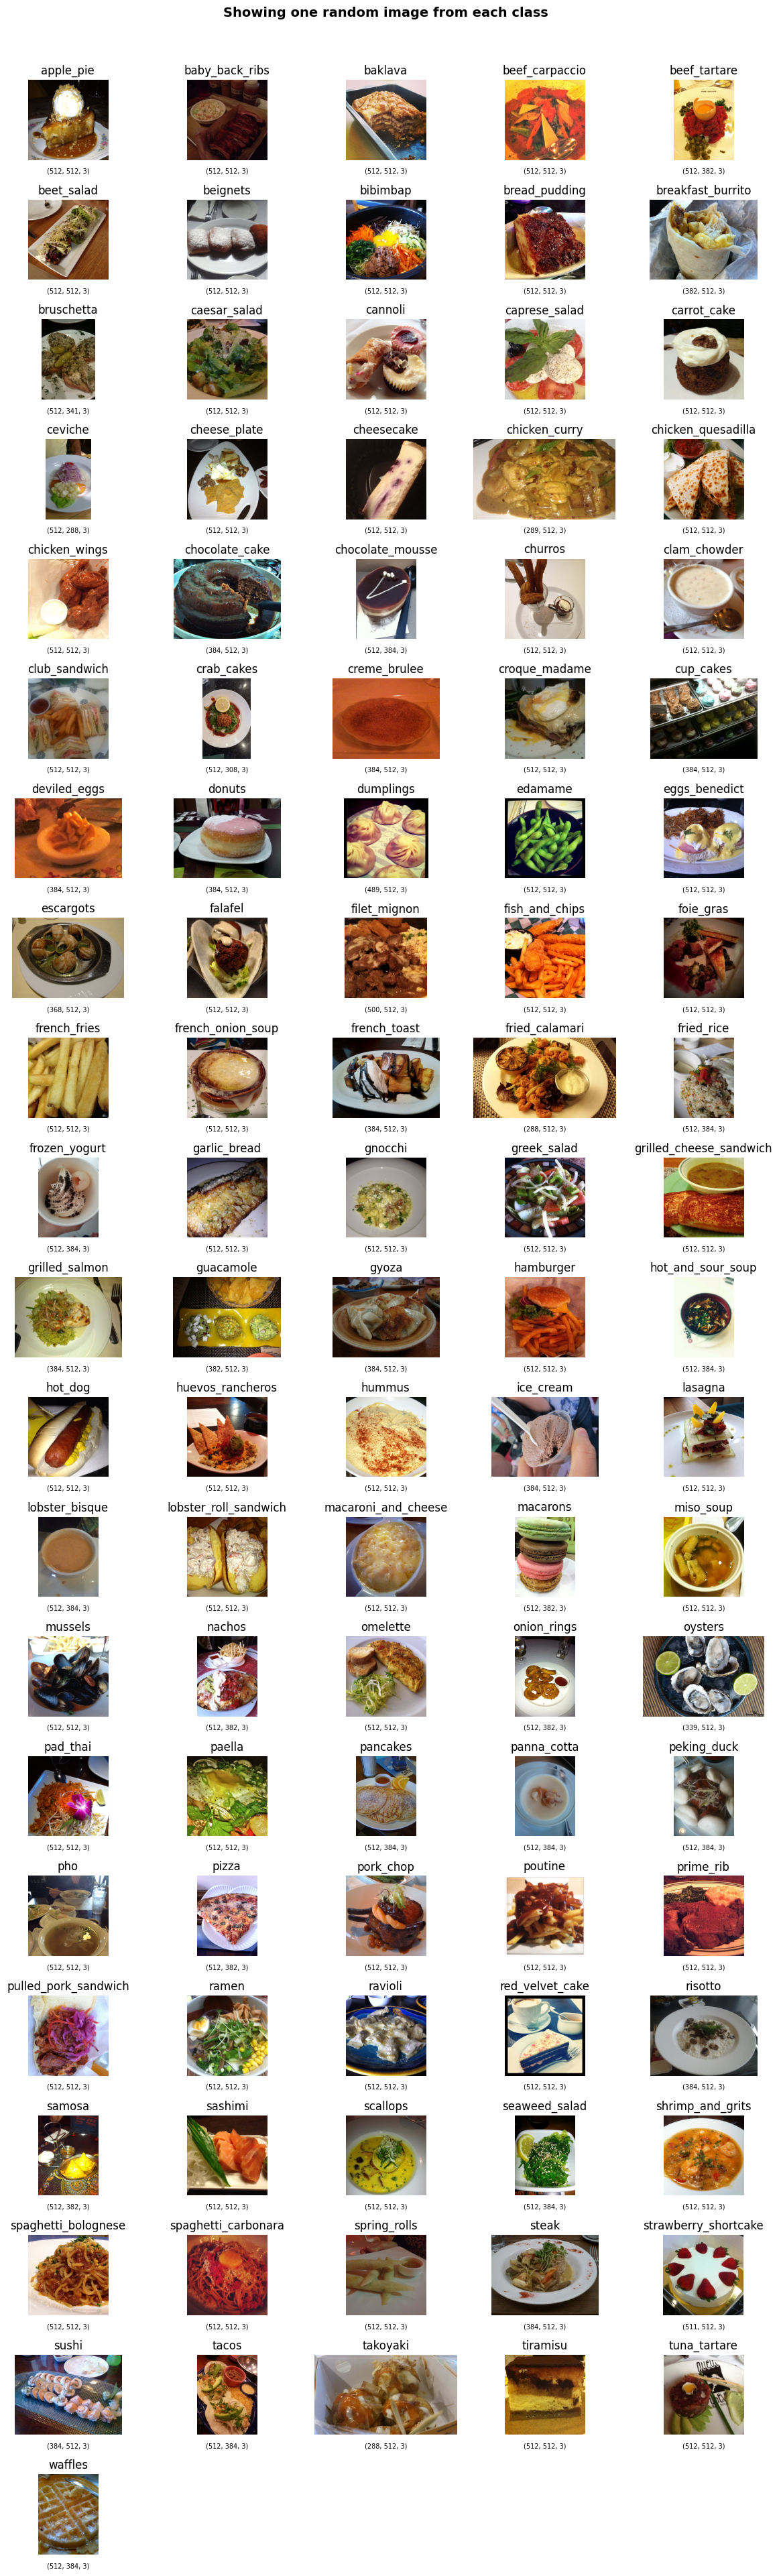

In [ ]:
data_dir = "/content/Food101/food-101/images"

# Create a figure to display the images
fig = plt.figure(figsize=(12, 38))
class_names = sorted(os.listdir(data_dir))[1:]   # we ignore '.DS_Store' file
fig.suptitle("Showing one random image from each class", y=1.01, fontsize=14, fontweight='bold') # Adding  y=1.01, fontsize=14
                                                                                                 # helped me fix the suptitle overlapping
                                                                                                 # with axes issue


# Iterate over each class
for i, class_name in enumerate(class_names):
    # Get a list of image files in the class directory
    class_directory = os.path.join(data_dir, class_name)
    image_files = os.listdir(class_directory)

    # Select a random image file from the class
    random_image = np.random.choice(image_files)
    image_path = os.path.join(class_directory, random_image)

    # Load and display the image
    ax = fig.add_subplot(21, 5, i+1)
    img = mpimg.imread(image_path)
    ax.imshow(img)
    ax.set_title(class_name)
    ax.text(0.5, -0.1, str(img.shape), fontsize=7, ha='center', va='top', transform=ax.transAxes)  # dimensiones de la imagen
    ax.axis('off')

# Adjust the layout and display the figure
plt.tight_layout()
plt.show()

MULTICLASS LEARNING - MEALS CLASSIFICATION

*1- First model: reducing the meals number.*

In [ ]:
def selected_classes(n):
  total_classes = os.listdir('/content/Food101/food-101/images')
  total_classes.remove('.DS_Store')
  chosen = np.random.choice(total_classes, n, replace=False)
  return chosen

In [ ]:
#shutil.rmtree('/content/Food101/food-101/multiclass_1')

In [ ]:
N=6

In [ ]:
import glob

CLASSES_mc1 = selected_classes(N)
base_dir = '/content/Food101/food-101/images'
multiclass1_dir = '/content/Food101/food-101/multiclass_1'

# TRAIN/VAL/TEST: 80/20%
SPLIT_RATIO_TEST=0.80


for cl in CLASSES_mc1:
    # path to the images of class "cl"
    img_path = os.path.join(base_dir, cl)

    # we obtain the list of all the images
    images = glob.glob(img_path + '/*.jpg')


    # TRAIN & TEST (80%-10%)
    # determine how many images constitute 80%.
    num_train = int(round(len(images)*SPLIT_RATIO_TEST))

    # split the images into two sets (train, test)
    train, test = images[:num_train], images[num_train:]


    # we create the directory train/clase and test/clase
    if not os.path.exists(os.path.join(multiclass1_dir, 'train', cl)):
            os.makedirs(os.path.join(multiclass1_dir, 'train', cl))
    if not os.path.exists(os.path.join(multiclass1_dir, 'test', cl)):
            os.makedirs(os.path.join(multiclass1_dir, 'test', cl))

    # we move the pictures to their corresponding paths
    for t in train:
        shutil.copy(t, os.path.join(multiclass1_dir, 'train', cl))
    for tst in test:
        shutil.copy(tst, os.path.join(multiclass1_dir, 'test', cl))


In [ ]:
train_dir = os.path.join(multiclass1_dir, 'train')
test_dir = os.path.join(multiclass1_dir, 'test')

In [ ]:
first = os.listdir(train_dir)[0]
first_training=len(os.listdir(os.path.join(train_dir, first)))
first_test=len(os.listdir(os.path.join(test_dir, first)))

print('Evaluation about "{}" meal'.format(first))
print('Training {} images: {}'.format(first,first_training))
print('Test {} images: {}'.format(first,first_test))

print('Sum of training, validation and test images:', (first_training+first_test))

Evaluation about "escargots" meal
Training escargots images: 800
Test escargots images: 200
Sum of training, validation and test images: 1000


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [ ]:
vgg_multiclass_1 = VGG16(weights='imagenet', include_top=False, input_shape=(240, 240, 3))

In [ ]:
vgg_multiclass_1.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# We freeze the layers of the pretrained model and apply Fine-tuning.
for layer in vgg_multiclass_1.layers[:-2]:
    layer.trainable = False

In [ ]:
# We add to the model a GlobalAveragePooling2D layer and two Denses(128,len(CLASSES))
x = GlobalAveragePooling2D()(vgg_multiclass_1.output)
x = Dense(256, activation='relu')(x)
# DROP OUT
x = Dropout(0.2)(x)
output = Dense(len(CLASSES_mc1), activation='softmax')(x)

vgg_model_multiclass_1 = Model(inputs=vgg_multiclass_1.input, outputs=output)

In [ ]:
from keras.optimizers import optimizer
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# DATA AUGMENTATION
train_datagen_mc1 = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    rotation_range=20,  # Rango de rotación aleatoria
    width_shift_range=0.1,  # Rango de cambio de ancho aleatorio
    height_shift_range=0.1,  # Rango de cambio de altura aleatorio
    zoom_range=0.2,  # Rango de zoom aleatorio
    horizontal_flip=True  # Volteo horizontal aleatorio
)

test_datagen_mc1 = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

In [ ]:
from keras.optimizers import optimizer
optim = keras.optimizers.Adam(learning_rate = 0.0001)
vgg_model_multiclass_1.compile(loss='sparse_categorical_crossentropy',
              optimizer = optim,
              metrics = ['accuracy'])

In [ ]:
BS = 100
train_generator_mc1 = train_datagen_mc1.flow_from_directory(train_dir,
                                                    target_size=(240,240),
                                                    batch_size=BS,
                                                    class_mode='sparse')
test_generator_mc1 = test_datagen_mc1.flow_from_directory(test_dir,
                                                    target_size=(240,240),
                                                    batch_size=BS,
                                                    class_mode='sparse')

Found 4800 images belonging to 6 classes.
Found 1200 images belonging to 6 classes.


In [ ]:
es_callback = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [ ]:
history_multiclass_1 = vgg_model_multiclass_1.fit(
    train_generator_mc1,
    steps_per_epoch=train_generator_mc1.n // BS,
    epochs=15,
    validation_data=test_generator_mc1,
    callbacks=[es_callback],
    validation_steps=test_generator_mc1.n // BS
)

Epoch 1/15
48/48 [==============================] - 109s 2s/step - loss: 1.7589 - accuracy: 0.6419 - val_loss: 0.5577 - val_accuracy: 0.8517
Epoch 2/15
48/48 [==============================] - 83s 2s/step - loss: 0.5660 - accuracy: 0.8275 - val_loss: 0.4249 - val_accuracy: 0.8867
Epoch 3/15
48/48 [==============================] - 86s 2s/step - loss: 0.4255 - accuracy: 0.8677 - val_loss: 0.3862 - val_accuracy: 0.8925
Epoch 4/15
48/48 [==============================] - 82s 2s/step - loss: 0.3264 - accuracy: 0.8967 - val_loss: 0.3683 - val_accuracy: 0.9008
Epoch 5/15
48/48 [==============================] - 83s 2s/step - loss: 0.2596 - accuracy: 0.9140 - val_loss: 0.3193 - val_accuracy: 0.9142
Epoch 6/15
48/48 [==============================] - 83s 2s/step - loss: 0.2252 - accuracy: 0.9248 - val_loss: 0.3429 - val_accuracy: 0.8992
Epoch 7/15
48/48 [==============================] - 82s 2s/step - loss: 0.1915 - accuracy: 0.9340 - val_loss: 0.3480 - val_accuracy: 0.9125


In [ ]:
import pandas as pd

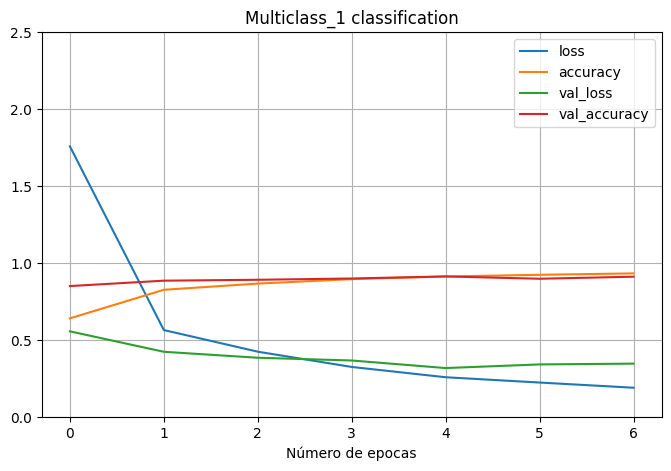

In [ ]:
pd.DataFrame(history_multiclass_1.history).plot(figsize=(8,5))
plt.grid(True)
plt.ylim(0,2.5)
plt.xlabel('Número de epocas')
plt.title('Multiclass_1 classification');

In [ ]:
train_generator_mc1.class_indices

{'chocolate_mousse': 0,
 'clam_chowder': 1,
 'escargots': 2,
 'guacamole': 3,
 'lobster_roll_sandwich': 4,
 'paella': 5}

In [ ]:
def meal_title(label, prediction, CLASSES):
  # Both prediction (probabilities) and label (one-hot) are arrays with one item per class.
  class_idx = CLASSES.tolist().index(label)
  prediction_idx = np.argmax(prediction, axis=-1).item()
  if class_idx == prediction_idx:
    return f'{CLASSES[prediction_idx]} [correct]', 'green'
  else:
    return f'{CLASSES[prediction_idx]} [incorrect] \nshould be: {CLASSES[class_idx]}', 'red'

In [ ]:
def get_titles(image, label, model, CLASSES):
  prediction = model.predict(image)
  title, color = meal_title(label, prediction, CLASSES)
  return title, color

In [ ]:
import cv2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

def prediction_visualization(data_dir, CLASSES, model):

  # Create a figure to display the images
  fig = plt.figure(figsize=(12, 38))
  CLASSES = np.sort(CLASSES)
  class_names = CLASSES

  # Iterate over each class
  for i, class_name in enumerate(class_names):
      # Get a list of image files in the class directory
      class_directory = os.path.join(data_dir, class_name)

      image_files = os.listdir(class_directory)

      # Select a random image file from the class
      random_image = np.random.choice(image_files)
      image_path = os.path.join(class_directory, random_image)

      # Load and display the image
      ax = fig.add_subplot(21, 4, i+1)
      img = image.load_img(image_path, target_size=(240, 240))
      imgarr = image.img_to_array(img)
      resized_img = cv2.resize(imgarr, (240, 240))
      preprocessed_img = preprocess_input(resized_img)
      preprocessed_img = np.expand_dims(preprocessed_img, axis=0)
      predictions = model.predict(preprocessed_img)
      title, color = get_titles(preprocessed_img, class_name, model, CLASSES)
      ax.imshow(img)
      ax.set_title(title, color=color, fontsize=11)
      ax.axis('off')

  # Adjust the layout and display the figure
  plt.tight_layout()
  plt.show()

(1, 240, 240, 3)
1/1 [==============================] - 0s 19ms/step
(1, 240, 240, 3)
1/1 [==============================] - 0s 23ms/step
(1, 240, 240, 3)
1/1 [==============================] - 0s 19ms/step
(1, 240, 240, 3)
1/1 [==============================] - 0s 22ms/step
(1, 240, 240, 3)
1/1 [==============================] - 0s 19ms/step
(1, 240, 240, 3)
1/1 [==============================] - 0s 20ms/step


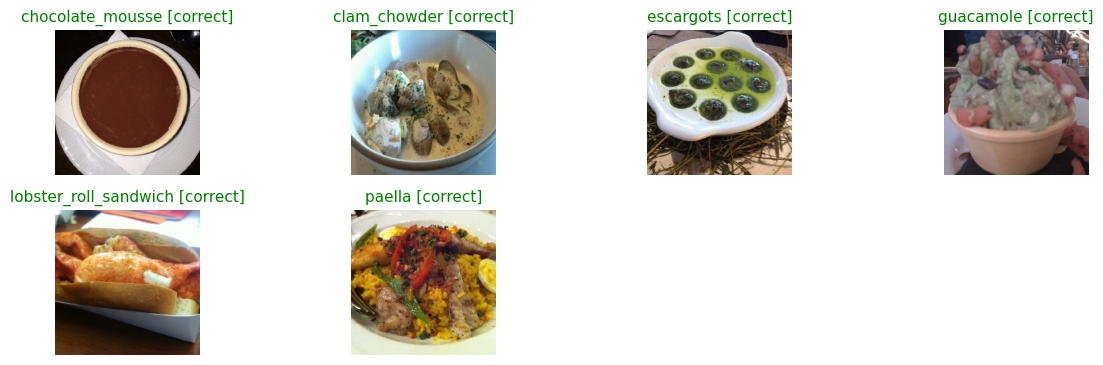

In [ ]:
data_dir_multiclass1 = "/content/Food101/food-101/multiclass_1/test"

prediction_visualization(data_dir_multiclass1, CLASSES_mc1, vgg_model_multiclass_1)

In [ ]:
from sklearn.metrics import recall_score, f1_score

def metrics(model, test_generator):
  labels = []
  predictions = []

  for i in range(len(test_generator)):
      images, batch_labels = test_generator[i]

      batch_predictions = model.predict(images)

      labels.extend(batch_labels)
      predictions.extend(np.argmax(batch_predictions, axis=1))

  #accuracy = np.mean(np.array(predictions) == np.array(labels))
  recall = recall_score(labels, predictions, average='weighted')

  f1 = f1_score(labels, predictions, average='weighted')

  #print("Accuracy:", accuracy)
  print("Recall:", recall)
  print("F1-score:", f1)

In [ ]:
metrics(vgg_model_multiclass_1, test_generator_mc1)

4/4 [==============================] - 0s 147ms/step
Accuracy: 0.7895
Recall: 0.7895
F1-score: 0.7871900343779057





*2- Second model: reducing the images number per meal.*

In [ ]:
#shutil.rmtree('/content/Food101/food-101/multiclass_2')

In [ ]:
IMAGES_NUMBER=600
N=32

In [ ]:
import glob

CLASSES_mc2 = selected_classes(N)
base_dir = '/content/Food101/food-101/images'
multiclass2_dir = '/content/Food101/food-101/multiclass_2'

# TRAIN/TEST: 80/20%
SPLIT_RATIO_TEST=0.80


for cl in CLASSES_mc2:
    # path de las imagenes de la clase cl
    img_path = os.path.join(base_dir, cl)

    # obtenemos la lista de todas las imagenes
    images = glob.glob(img_path + '/*.jpg')

    # TRAIN & TEST (80%-20%)
    # determinamos cuantas imagenes son el 80%
    num_train = int(round(IMAGES_NUMBER*SPLIT_RATIO_TEST))

    # separamos las imagenes en dos listas (train, test)
    train, test = images[:num_train], images[num_train:IMAGES_NUMBER]


    # creamos la carpeta de train/clase y test/clase
    if not os.path.exists(os.path.join(multiclass2_dir, 'train', cl)):
            os.makedirs(os.path.join(multiclass2_dir, 'train', cl))
    if not os.path.exists(os.path.join(multiclass2_dir, 'test', cl)):
            os.makedirs(os.path.join(multiclass2_dir, 'test', cl))

    # movemos las imagenes
    for t in train:
        shutil.copy(t, os.path.join(multiclass2_dir, 'train', cl))
    for tst in test:
        shutil.copy(tst, os.path.join(multiclass2_dir, 'test', cl))

In [ ]:
train_dir = os.path.join(multiclass2_dir, 'train')
test_dir = os.path.join(multiclass2_dir, 'test')

In [ ]:
first = os.listdir(train_dir)[0]
first_training=len(os.listdir(os.path.join(train_dir, first)))
first_test=len(os.listdir(os.path.join(test_dir, first)))

print('Evaluation about "{}" meal'.format(first))
print('Training {} images: {}'.format(first,first_training))
print('Test {} images: {}'.format(first,first_test))

print('Sum of training, validation and test images:', (first_training+first_test))

Evaluation about "risotto" meal
Training risotto images: 480
Test risotto images: 120
Sum of training, validation and test images: 600


In [ ]:
vgg_multiclass_2 = VGG16(weights='imagenet', include_top=False, input_shape=(240, 240, 3))

In [ ]:
# We freeze the layers of the pretrained model and apply Fine-tuning.
for layer in vgg_multiclass_2.layers[:-2]:
    layer.trainable = False

In [ ]:
# We add to the model a GlobalAveragePooling2D layer and two Denses(128,len(CLASSES))
x = GlobalAveragePooling2D()(vgg_multiclass_2.output)
x = Dense(256, activation='relu')(x)
# DROP OUT
x = Dropout(0.2)(x)
output = Dense(len(CLASSES_mc2), activation='softmax')(x)

vgg_model_multiclass_2 = Model(inputs=vgg_multiclass_2.input, outputs=output)

In [ ]:
from keras.optimizers import optimizer
optim = keras.optimizers.Adam(learning_rate = 0.0001)
vgg_model_multiclass_2.compile(loss='sparse_categorical_crossentropy',
              optimizer = optim,
              metrics = ['accuracy'])

In [ ]:
# DATA AUGMENTATION
train_datagen_mc2 = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    rotation_range=20,  # Rango de rotación aleatoria
    width_shift_range=0.1,  # Rango de cambio de ancho aleatorio
    height_shift_range=0.1,  # Rango de cambio de altura aleatorio
    zoom_range=0.2,  # Rango de zoom aleatorio
    horizontal_flip=True  # Volteo horizontal aleatorio
)

test_datagen_mc2 = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

In [ ]:
BS=100
train_generator_mc2 = train_datagen_mc2.flow_from_directory(train_dir,
                                                    target_size=(240,240),
                                                    batch_size=BS,
                                                    class_mode='sparse')
test_generator_mc2 = test_datagen_mc2.flow_from_directory(test_dir,
                                                    target_size=(240,240),
                                                    batch_size=BS,
                                                    class_mode='sparse')

Found 15360 images belonging to 32 classes.
Found 3840 images belonging to 32 classes.


In [ ]:
es_callback = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [ ]:
history_multiclass_2 = vgg_model_multiclass_2.fit(
    train_generator_mc2,
    steps_per_epoch=train_generator_mc2.n // BS,
    epochs=15,
    validation_data=test_generator_mc2,
    callbacks=[es_callback],
    validation_steps=test_generator_mc2.n // BS
)

Epoch 1/15
153/153 [==============================] - 265s 2s/step - loss: 3.1748 - accuracy: 0.2748 - val_loss: 1.7960 - val_accuracy: 0.5158
Epoch 2/15
153/153 [==============================] - 254s 2s/step - loss: 1.7215 - accuracy: 0.5288 - val_loss: 1.3659 - val_accuracy: 0.6424
Epoch 3/15
153/153 [==============================] - 255s 2s/step - loss: 1.3608 - accuracy: 0.6249 - val_loss: 1.2163 - val_accuracy: 0.6711
Epoch 4/15
153/153 [==============================] - 254s 2s/step - loss: 1.1459 - accuracy: 0.6788 - val_loss: 1.1116 - val_accuracy: 0.7092
Epoch 5/15
153/153 [==============================] - 254s 2s/step - loss: 1.0135 - accuracy: 0.7156 - val_loss: 1.0492 - val_accuracy: 0.7176
Epoch 6/15
153/153 [==============================] - 253s 2s/step - loss: 0.9047 - accuracy: 0.7423 - val_loss: 1.0198 - val_accuracy: 0.7292
Epoch 7/15
153/153 [==============================] - 254s 2s/step - loss: 0.8225 - accuracy: 0.7636 - val_loss: 0.9888 - val_accuracy: 0.7484

KeyboardInterrupt: ignored

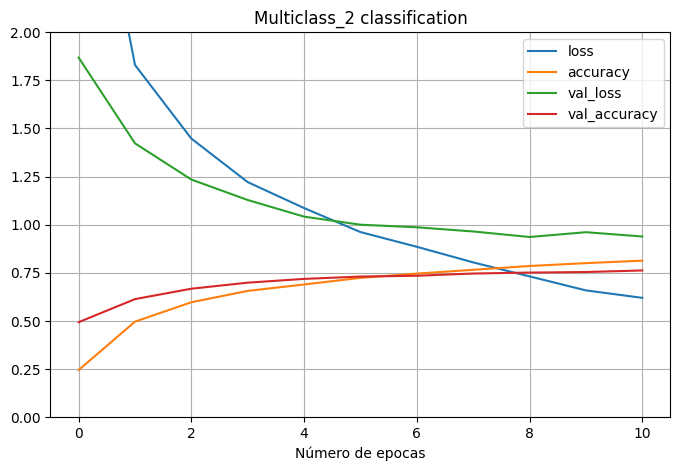

In [ ]:
pd.DataFrame(history_multiclass_2.history).plot(figsize=(8,5))
plt.grid(True)
plt.ylim(0,2)
plt.xlabel('Número de epocas')
plt.title('Multiclass_2 classification');

1/1 [==============================] - 0s 18ms/step


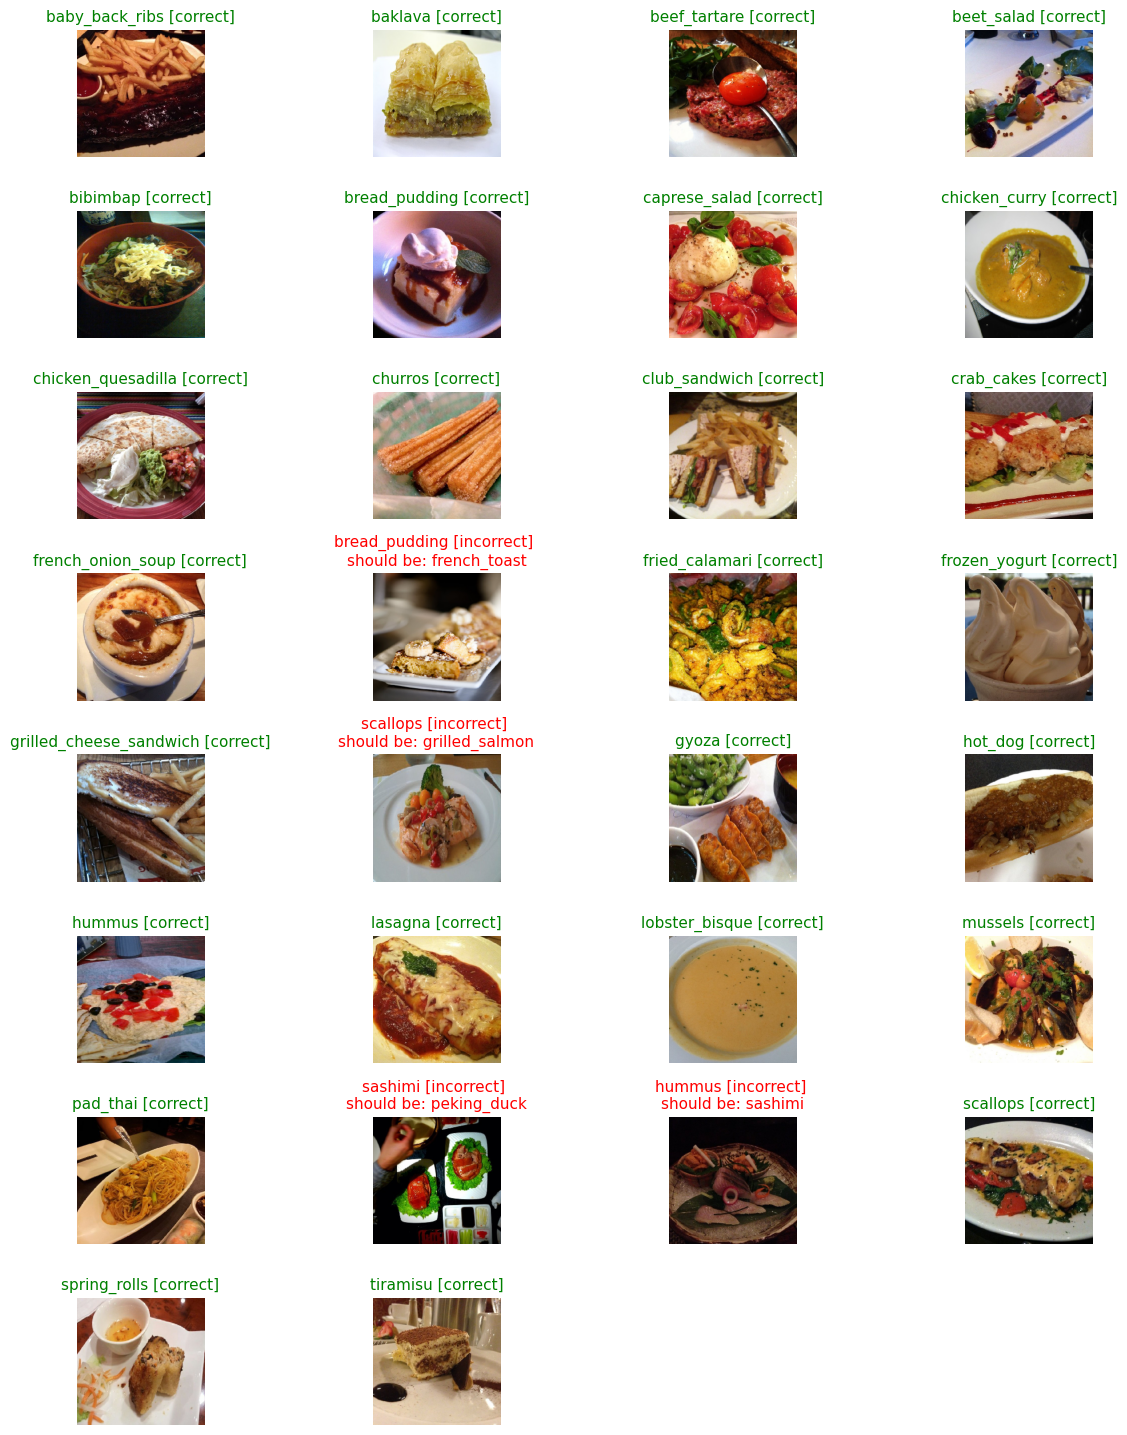

In [ ]:
data_dir_multiclass2 = "/content/Food101/food-101/multiclass_2/test"

prediction_visualization(data_dir_multiclass2, CLASSES_mc2, vgg_model_multiclass_2)

In [ ]:
metrics(vgg_model_multiclass_2, test_generator_mc2)

4/4 [==============================] - 0s 142ms/step
Accuracy: 0.7514285714285714
Recall: 0.7514285714285714
F1-score: 0.7517651879733925


CNN OWN

In [ ]:
#shutil.rmtree('/content/Food101/food-101/multiclass_3')

In [ ]:
IMAGES_NUMBER=700
N=10

In [ ]:
import glob

CLASSES_mc3 = selected_classes(N)
base_dir = '/content/Food101/food-101/images'
multiclass3_dir = '/content/Food101/food-101/multiclass_3'

# TRAIN/TEST: 80/20%
SPLIT_RATIO_TEST=0.80


for cl in CLASSES_mc3:
    # path de las imagenes de la clase cl
    img_path = os.path.join(base_dir, cl)

    # obtenemos la lista de todas las imagenes
    images = glob.glob(img_path + '/*.jpg')

    # TRAIN & TEST (80%-20%)
    # determinamos cuantas imagenes son el 80%
    num_train = int(round(IMAGES_NUMBER*SPLIT_RATIO_TEST))

    # separamos las imagenes en dos listas (train, test)
    train, test = images[:num_train], images[num_train:IMAGES_NUMBER]


    # creamos la carpeta de train/clase y test/clase
    if not os.path.exists(os.path.join(multiclass3_dir, 'train', cl)):
            os.makedirs(os.path.join(multiclass3_dir, 'train', cl))
    if not os.path.exists(os.path.join(multiclass3_dir, 'test', cl)):
            os.makedirs(os.path.join(multiclass3_dir, 'test', cl))

    # movemos las imagenes
    for t in train:
        shutil.copy(t, os.path.join(multiclass3_dir, 'train', cl))
    for tst in test:
        shutil.copy(tst, os.path.join(multiclass3_dir, 'test', cl))

In [ ]:
train_dir = os.path.join(multiclass3_dir, 'train')
test_dir = os.path.join(multiclass3_dir, 'test')

In [ ]:
first = os.listdir(train_dir)[0]
first_training=len(os.listdir(os.path.join(train_dir, first)))
first_test=len(os.listdir(os.path.join(test_dir, first)))

print('Evaluation about "{}" meal'.format(first))
print('Training {} images: {}'.format(first,first_training))
print('Test {} images: {}'.format(first,first_test))

print('Sum of training, validation and test images:', (first_training+first_test))

Evaluation about "fried_calamari" meal
Training fried_calamari images: 560
Test fried_calamari images: 140
Sum of training, validation and test images: 700


In [ ]:
#3 CONVOLUCIONALES
#3 MAXPOOLING

vgg_model_multiclass_3 = keras.Sequential()

vgg_model_multiclass_3.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3),
                              input_shape = (240,240,3), padding = 'same',
                              activation = 'relu', name = 'conv1'))
vgg_model_multiclass_3.add(keras.layers.Conv2D(64, 3, padding = 'same', activation = 'relu', name = 'conv2'))
vgg_model_multiclass_3.add(keras.layers.Conv2D(64, 3, padding = 'same', activation = 'relu', name = 'conv3'))

vgg_model_multiclass_3.add(keras.layers.MaxPooling2D(strides = (2,2)))

vgg_model_multiclass_3.add(keras.layers.Conv2D(256, 3, padding = 'same', activation = 'relu', name = 'conv4'))
vgg_model_multiclass_3.add(keras.layers.Conv2D(256, 3, padding = 'same', activation = 'relu', name = 'conv5'))
vgg_model_multiclass_3.add(keras.layers.Conv2D(256, 3, padding = 'same', activation = 'relu', name = 'conv6'))

vgg_model_multiclass_3.add(keras.layers.MaxPooling2D(strides = (2,2)))

vgg_model_multiclass_3.add(keras.layers.Conv2D(512, 3, padding = 'same', activation = 'relu', name = 'conv7'))
vgg_model_multiclass_3.add(keras.layers.Conv2D(512, 3, padding = 'same', activation = 'relu', name = 'conv8'))
vgg_model_multiclass_3.add(keras.layers.Conv2D(512, 3, padding = 'same', activation = 'relu', name = 'conv9'))

vgg_model_multiclass_3.add(keras.layers.MaxPooling2D(strides = (2,2)))

vgg_model_multiclass_3.add(keras.layers.GlobalAveragePooling2D())

vgg_model_multiclass_3.add(keras.layers.Dense(units=256, activation='relu'))
vgg_model_multiclass_3.add(keras.layers.Dropout(0.2))
vgg_model_multiclass_3.add(keras.layers.Dense(units=len(CLASSES_mc3), activation='softmax'))

In [ ]:
from keras.optimizers import optimizer
optim = keras.optimizers.Adam(learning_rate = 0.0001)
vgg_model_multiclass_3.compile(loss='sparse_categorical_crossentropy',
              optimizer = optim,
              metrics = ['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# DATA AUGMENTATION
train_datagen_mc3 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # Rango de rotación aleatoria
    width_shift_range=0.1,  # Rango de cambio de ancho aleatorio
    height_shift_range=0.1,  # Rango de cambio de altura aleatorio
    zoom_range=0.2,  # Rango de zoom aleatorio
    horizontal_flip=True  # Volteo horizontal aleatorio
)

test_datagen_mc3 = ImageDataGenerator(
    rescale=1./255)

In [ ]:
BS=80
train_generator_mc3 = train_datagen_mc3.flow_from_directory(train_dir,
                                                    target_size=(240,240),
                                                    batch_size=BS,
                                                    class_mode='sparse')
test_generator_mc3 = test_datagen_mc3.flow_from_directory(test_dir,
                                                    target_size=(240,240),
                                                    batch_size=BS,
                                                    class_mode='sparse')

Found 5600 images belonging to 10 classes.
Found 1400 images belonging to 10 classes.


In [ ]:
es_callback = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [ ]:
history_multiclass_3 = vgg_model_multiclass_3.fit(
    train_generator_mc3,
    steps_per_epoch=train_generator_mc3.n // BS,
    epochs=15,
    validation_data=test_generator_mc3,
    callbacks=[es_callback],
    validation_steps=test_generator_mc3.n // BS
)

Epoch 1/15
70/70 [==============================] - 310s 4s/step - loss: 2.2532 - accuracy: 0.1371 - val_loss: 2.1188 - val_accuracy: 0.1846
Epoch 2/15
70/70 [==============================] - 254s 4s/step - loss: 2.0988 - accuracy: 0.1995 - val_loss: 2.0336 - val_accuracy: 0.1971
Epoch 3/15
70/70 [==============================] - 253s 4s/step - loss: 2.0597 - accuracy: 0.2209 - val_loss: 2.1450 - val_accuracy: 0.2015
Epoch 4/15
70/70 [==============================] - 253s 4s/step - loss: 2.0502 - accuracy: 0.2255 - val_loss: 2.0012 - val_accuracy: 0.2338
Epoch 5/15
70/70 [==============================] - 253s 4s/step - loss: 2.0322 - accuracy: 0.2332 - val_loss: 2.0371 - val_accuracy: 0.2368
Epoch 6/15
70/70 [==============================] - 254s 4s/step - loss: 1.9996 - accuracy: 0.2479 - val_loss: 1.9965 - val_accuracy: 0.2522
Epoch 7/15
70/70 [==============================] - 254s 4s/step - loss: 1.9726 - accuracy: 0.2611 - val_loss: 1.9344 - val_accuracy: 0.2868
Epoch 8/15
70

In [ ]:
import pandas as pd


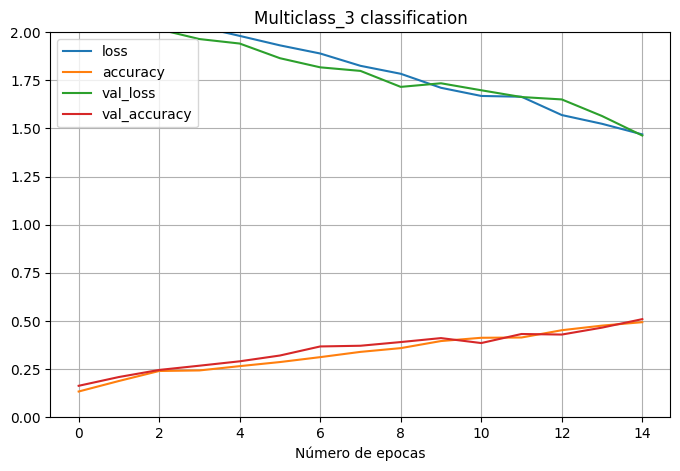

In [ ]:
pd.DataFrame(history_multiclass_3.history).plot(figsize=(8,5))
plt.grid(True)
plt.ylim(0,2)
plt.xlabel('Número de epocas')
plt.title('Multiclass_3 classification');

1/1 [==============================] - 0s 18ms/step


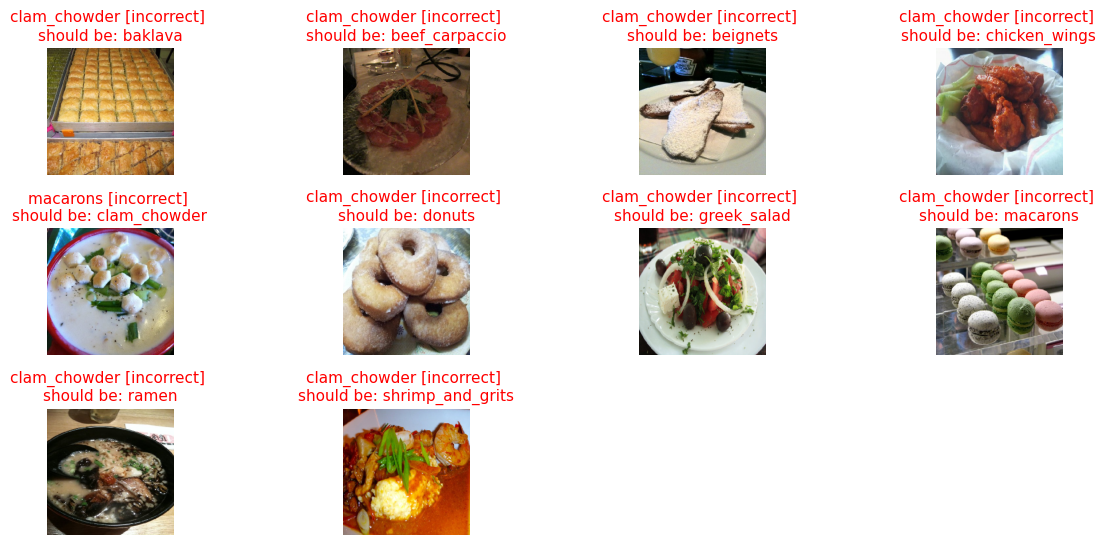

In [ ]:
data_dir_multiclass3 = "/content/Food101/food-101/multiclass_3/test"

prediction_visualization(data_dir_multiclass3, CLASSES_mc3, vgg_model_multiclass_3)

In [ ]:
metrics(vgg_model_multiclass_3, test_generator_mc3)

2/2 [==============================] - 3s 3s/step
Recall: 0.4107142857142857
F1-score: 0.3935274058985943


In [ ]:
vgg_model_multiclass_3 = keras.Sequential()

vgg_model_multiclass_3.add(keras.layers.Conv2D(filters = 32, kernel_size = (3,3),
                              input_shape = (240,240,3), padding = 'same',
                              activation = 'relu', name = 'conv1'))

vgg_model_multiclass_3.add(keras.layers.MaxPooling2D(strides = (2,2)))

vgg_model_multiclass_3.add(keras.layers.Conv2D(64, 3, padding = 'same', activation = 'relu', name = 'conv2'))

vgg_model_multiclass_3.add(keras.layers.MaxPooling2D(strides = (2,2)))

vgg_model_multiclass_3.add(keras.layers.Conv2D(96, 3, padding = 'same', activation = 'relu', name = 'conv3'))

vgg_model_multiclass_3.add(keras.layers.MaxPooling2D(strides = (2,2)))

vgg_model_multiclass_3.add(keras.layers.GlobalAveragePooling2D())

vgg_model_multiclass_3.add(keras.layers.Dense(units=256, activation='relu'))
vgg_model_multiclass_3.add(keras.layers.Dropout(0.2))
vgg_model_multiclass_3.add(keras.layers.Dense(units=len(CLASSES_mc3), activation='softmax'))

MULTILABEL LEARNING - INGREDIENTS CLASSIFICATION - PRETRAINED CNN

In [ ]:
label_dir = '/content/Food101/food-101/meta/ingredients_simplified.txt'
labels = []

with open(label_dir, "r") as file:
    for line in file:
      ingredients = [ingredient.rstrip('\n') for ingredient in line.split(",")]
      labels.append(ingredients)


print(labels)
print(len(labels))

[['butter', 'flour', 'sugar', 'brown sugar', 'apple', 'cinnamon', 'nut'], ['baby back ribs', 'apple', 'salt', 'mustard', 'brown sugar', 'worcestershire', 'gin', 'chili'], ['nut', 'cinnamon', 'bread', 'butter', 'phyllo dough', 'sugar', 'honey', 'lemon', 'baklava'], ['beef', 'lemon', 'gin', 'salt', 'pepper', 'baby arugula', 'asiago'], ['fat', 'steak', 'gin', 'shallot', 'parsley', 'capers', 'worcestershire', 'egg', 'black pepper', 'crostini'], ['beets', 'spinach', 'gorgonzola', 'nut', 'red wine', 'dijon mustard', 'gin', 'salt', 'black pepper', 'herbs'], ['water', 'sugar', 'yeast', 'egg', 'salt', 'milk', 'butter', 'flour', 'sugar'], ['grain', 'steak', 'soybean sprouts', 'spinach', 'cucumber', 'zucchini', 'carrot', 'garlic', 'scallions', 'soy', 'oil', 'seeds', 'salt', 'pepper', 'oil', 'egg', 'pepper', 'sugar', 'water'], ['bread', 'milk', 'sugar', 'butter', 'salt', 'egg', 'vanilla'], ['rolls', 'bacon', 'egg', 'brie', 'onion', 'cheddar', 'flour', 'salsa'], ['plum', 'garlic', 'gin', 'balsamic 

In [ ]:
def selected_labels(classes):
  total_classes = os.listdir('/content/Food101/food-101/images')
  total_classes.remove('.DS_Store')
  total_classes=sorted(total_classes)

  dicc_total_labels = dict(zip(total_classes,labels))

  dicc_labels={}
  for cl in classes:
    if(cl not in dicc_labels):
      dicc_labels[cl]=dicc_total_labels[cl]

  return dicc_labels

In [ ]:
N=5
IMAGES_NUMBER = 900

In [ ]:
import glob
import cv2 as cv
from keras.utils import img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

CLASSES_ml1 = selected_classes(N)
dicc_labels_ml1 = selected_labels(CLASSES_ml1)

base_dir = '/content/Food101/food-101/images'

# TRAIN/VAL/TEST: 80/20%
SPLIT_RATIO_TEST=0.80

train_images = []
train_labels = []

test_images = []
test_labels = []


for cl in CLASSES_ml1:
    # path de las imagenes de la clase cl
    img_path = os.path.join(base_dir, cl)

    # obtenemos la lista de todas las imagenes
    images = glob.glob(img_path + '/*.jpg')


    # TRAIN & TEST (80%-20%)
    # determinamos cuantas imagenes son el 80%
    num_train = int(round(IMAGES_NUMBER*SPLIT_RATIO_TEST))

    # separamos las imagenes en dos listas (train, test)
    train, test = images[:num_train], images[num_train:IMAGES_NUMBER]


    # añadimos las imagenes
    for t in train:
      img = image.load_img(t, target_size=(240, 240))
      imgarr = image.img_to_array(img)
      resized_img = cv.resize(imgarr, (240, 240))

      train_images.append(resized_img)
      train_labels.append(dicc_labels_ml1[cl])

    for tst in test:
      img = image.load_img(tst, target_size=(240, 240))
      imgarr = image.img_to_array(img)
      resized_img = cv.resize(imgarr, (240, 240))

      test_images.append(resized_img)
      test_labels.append(dicc_labels_ml1[cl])


In [ ]:
print(CLASSES_ml1)

['grilled_salmon' 'french_toast' 'gyoza' 'bread_pudding' 'pho']


In [ ]:
print(dicc_labels_ml1)

{'grilled_salmon': ['salmon', 'brown sugar', 'lemon', 'lemon', 'soy', 'water', 'oil'], 'french_toast': ['egg', 'milk', 'vanilla', 'cinnamon', 'salt', 'baguette', 'butter', 'sugar', 'maple syrup'], 'gyoza': ['cabbage', 'pork', 'onion', 'soy', 'sake', 'oil', 'garlic', 'corn starch', 'gyoza wrappers', 'oil', 'water', 'rice', 'oil'], 'bread_pudding': ['bread', 'milk', 'sugar', 'butter', 'salt', 'egg', 'vanilla'], 'pho': ['marrow', 'oxtail', 'beef', 'clove', 'anise', 'cinnamon', 'cardamom', 'black pepper', 'coriander', 'fennel', 'gin', 'onion', 'shallot', 'fish', 'sugar', 'noodles', 'scallions', 'eye round', 'cilantro', 'basil', 'beans', 'lime', 'bird chile', 'chile', 'hoisin']}


In [ ]:
train_labels[-1]

['marrow',
 'oxtail',
 'beef',
 'clove',
 'anise',
 'cinnamon',
 'cardamom',
 'black pepper',
 'coriander',
 'fennel',
 'gin',
 'onion',
 'shallot',
 'fish',
 'sugar',
 'noodles',
 'scallions',
 'eye round',
 'cilantro',
 'basil',
 'beans',
 'lime',
 'bird chile',
 'chile',
 'hoisin']

In [ ]:
train_images=np.array(train_images, dtype="float") / 255.0
test_images=np.array(test_images, dtype="float") / 255.0

train_labels=np.array(train_labels)
test_labels=np.array(test_labels)

<ipython-input-36-a72bd6d1ea74>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_labels=np.array(train_labels)
<ipython-input-36-a72bd6d1ea74>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  test_labels=np.array(test_labels)


In [ ]:
train_labels

array([list(['salmon', 'brown sugar', 'lemon', 'lemon', 'soy', 'water', 'oil']),
       list(['salmon', 'brown sugar', 'lemon', 'lemon', 'soy', 'water', 'oil']),
       list(['salmon', 'brown sugar', 'lemon', 'lemon', 'soy', 'water', 'oil']),
       ...,
       list(['marrow', 'oxtail', 'beef', 'clove', 'anise', 'cinnamon', 'cardamom', 'black pepper', 'coriander', 'fennel', 'gin', 'onion', 'shallot', 'fish', 'sugar', 'noodles', 'scallions', 'eye round', 'cilantro', 'basil', 'beans', 'lime', 'bird chile', 'chile', 'hoisin']),
       list(['marrow', 'oxtail', 'beef', 'clove', 'anise', 'cinnamon', 'cardamom', 'black pepper', 'coriander', 'fennel', 'gin', 'onion', 'shallot', 'fish', 'sugar', 'noodles', 'scallions', 'eye round', 'cilantro', 'basil', 'beans', 'lime', 'bird chile', 'chile', 'hoisin']),
       list(['marrow', 'oxtail', 'beef', 'clove', 'anise', 'cinnamon', 'cardamom', 'black pepper', 'coriander', 'fennel', 'gin', 'onion', 'shallot', 'fish', 'sugar', 'noodles', 'scallions', 'ey

In [ ]:
train_images[:5]

array([[[[0.15294118, 0.18039216, 0.04705882],
         [0.14901961, 0.18039216, 0.03529412],
         [0.18039216, 0.21176471, 0.05882353],
         ...,
         [0.54901961, 0.5254902 , 0.47058824],
         [0.54901961, 0.51764706, 0.46666667],
         [0.54509804, 0.51372549, 0.47058824]],

        [[0.16470588, 0.19607843, 0.05098039],
         [0.14509804, 0.17647059, 0.03137255],
         [0.15294118, 0.18431373, 0.03921569],
         ...,
         [0.54901961, 0.5254902 , 0.47058824],
         [0.54901961, 0.51764706, 0.46666667],
         [0.55294118, 0.52156863, 0.47843137]],

        [[0.15686275, 0.2       , 0.04313725],
         [0.13333333, 0.17254902, 0.02745098],
         [0.14509804, 0.18431373, 0.03921569],
         ...,
         [0.54901961, 0.5254902 , 0.47058824],
         [0.55294118, 0.52156863, 0.47843137],
         [0.55686275, 0.52156863, 0.48627451]],

        ...,

        [[0.48627451, 0.49803922, 0.62745098],
         [0.49803922, 0.49803922, 0.63137255]

In [ ]:
print("Number of train images loaded:", len(train_images))
print("Number of test images loaded:", len(test_images))
print("Shape of train images array:", train_images.shape)
print("Shape of test images array:", test_images.shape)

Number of train images loaded: 3600
Number of test images loaded: 900
Shape of train images array: (3600, 240, 240, 3)
Shape of test images array: (900, 240, 240, 3)


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
label_binarizer = MultiLabelBinarizer()
train_labels_encoded = label_binarizer.fit_transform(train_labels)
test_labels_encoded = label_binarizer.fit_transform(test_labels)

In [ ]:
train_labels_encoded.shape[1]

46

In [ ]:
labels_ml1_size = len(label_binarizer.classes_)
labels_ml1_size

46

In [ ]:
print(train_labels[0])
train_labels_encoded[0]

['salmon', 'brown sugar', 'lemon', 'lemon', 'soy', 'water', 'oil']


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1])

In [ ]:
print(train_labels[-1])
train_labels_encoded[-1]

['marrow', 'oxtail', 'beef', 'clove', 'anise', 'cinnamon', 'cardamom', 'black pepper', 'coriander', 'fennel', 'gin', 'onion', 'shallot', 'fish', 'sugar', 'noodles', 'scallions', 'eye round', 'cilantro', 'basil', 'beans', 'lime', 'bird chile', 'chile', 'hoisin']


array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0])

In [ ]:
print(len(train_labels_encoded[0]))
print(len(train_labels_encoded))

46
3600


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [ ]:
vgg_multilabel_1 = VGG16(weights='imagenet', include_top=False, input_shape=(240, 240, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# We freeze the layers of the pretrained model and apply Fine-tuning.
for layer in vgg_multilabel_1.layers[:-2]:
    layer.trainable = False

In [ ]:
# We add to the model a GlobalAveragePooling2D layer and two Denses(128,len(labels_ml1_size))
x = GlobalAveragePooling2D()(vgg_multilabel_1.output)
x = Dense(256, activation='relu')(x)
# DROP OUT
x = Dropout(0.2)(x)
output = Dense(labels_ml1_size, activation='sigmoid')(x)

vgg_multilabel_model = Model(inputs=vgg_multilabel_1.input, outputs=output)

In [ ]:
from keras.optimizers import optimizer
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from keras.optimizers import optimizer
optim = keras.optimizers.Adam(learning_rate = 0.0001)
vgg_multilabel_model.compile(loss='binary_crossentropy',
              optimizer = optim,
              metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input

# DATA AUGMENTATION
train_datagen_mlb1 = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,  # Rango de rotación aleatoria
    width_shift_range=0.1,  # Rango de cambio de ancho aleatorio
    height_shift_range=0.1,  # Rango de cambio de altura aleatorio
    zoom_range=0.2,  # Rango de zoom aleatorio
    horizontal_flip=True  # Volteo horizontal aleatorio
)

test_datagen_mlb1 = ImageDataGenerator(
    preprocessing_function=preprocess_input)

In [ ]:
es_callback = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [ ]:
print(train_images.shape)
print(train_labels_encoded.shape)

(3600, 240, 240, 3)
(3600, 46)


In [ ]:
print(test_images.shape)
print(test_labels_encoded.shape)

(900, 240, 240, 3)
(900, 46)


In [ ]:
print(test_labels_encoded)

[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [1 0 1 ... 1 0 0]
 [1 0 1 ... 1 0 0]
 [1 0 1 ... 1 0 0]]


In [ ]:
history = vgg_multilabel_model.fit(
    x=train_images,
    y=train_labels_encoded,
    batch_size=100,
    steps_per_epoch=len(train_images) // 100,
    epochs=10,
    validation_data=(test_images, test_labels_encoded)
)

Epoch 1/10
36/36 [==============================] - 42s 701ms/step - loss: 0.6009 - accuracy: 0.0094 - val_loss: 0.4955 - val_accuracy: 0.0000e+00
Epoch 2/10
36/36 [==============================] - 26s 714ms/step - loss: 0.4584 - accuracy: 0.0017 - val_loss: 0.3760 - val_accuracy: 0.0000e+00
Epoch 3/10
36/36 [==============================] - 25s 690ms/step - loss: 0.3676 - accuracy: 0.0039 - val_loss: 0.3092 - val_accuracy: 0.0000e+00
Epoch 4/10
36/36 [==============================] - 24s 680ms/step - loss: 0.3134 - accuracy: 0.0056 - val_loss: 0.2728 - val_accuracy: 0.0000e+00
Epoch 5/10
36/36 [==============================] - 25s 689ms/step - loss: 0.2781 - accuracy: 0.0153 - val_loss: 0.2466 - val_accuracy: 0.0000e+00
Epoch 6/10
36/36 [==============================] - 25s 695ms/step - loss: 0.2545 - accuracy: 0.0147 - val_loss: 0.2321 - val_accuracy: 0.0000e+00
Epoch 7/10
36/36 [==============================] - 25s 688ms/step - loss: 0.2358 - accuracy: 0.0167 - val_loss: 0.225

In [ ]:
history_multilabel = vgg_multilabel_model.fit(
    train_datagen_mlb1.flow(train_images, train_labels_encoded, batch_size=100),
    steps_per_epoch=len(train_images) // 100,
    epochs=5,
    callbacks=[es_callback],
    validation_data=test_datagen_mlb1.flow(test_images, test_labels_encoded)
)

Epoch 1/5
24/24 [==============================] - 41s 2s/step - loss: 0.9413 - accuracy: 0.0121 - val_loss: 0.6467 - val_accuracy: 0.0000e+00
Epoch 2/5
24/24 [==============================] - 32s 1s/step - loss: 0.6501 - accuracy: 4.1667e-04 - val_loss: 0.6381 - val_accuracy: 0.0000e+00
Epoch 3/5
24/24 [==============================] - 33s 1s/step - loss: 0.6427 - accuracy: 0.0000e+00 - val_loss: 0.6373 - val_accuracy: 0.0000e+00
Epoch 4/5
24/24 [==============================] - 32s 1s/step - loss: 0.6409 - accuracy: 0.0000e+00 - val_loss: 0.6359 - val_accuracy: 0.0000e+00
Epoch 5/5
24/24 [==============================] - 32s 1s/step - loss: 0.6387 - accuracy: 0.0000e+00 - val_loss: 0.6351 - val_accuracy: 0.0000e+00


In [ ]:
import pandas as pd

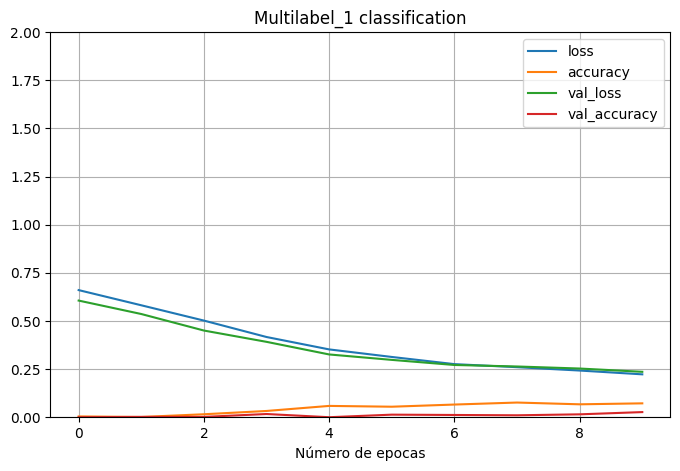

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.ylim(0,2)
plt.xlabel('Número de epocas')
plt.title('Multilabel_1 classification');

MULTILABEL LEARNING - INGREDIENTS CLASSIFICATION - OWN CNN

In [ ]:
N=3
IMAGES_NUMBER = 1000

In [ ]:
import glob
import cv2 as cv
from keras.utils import img_to_array


CLASSES_ml1 = selected_classes(N)
dicc_labels_ml1 = selected_labels(CLASSES_ml1)

base_dir = '/content/Food101/food-101/images'

# TRAIN/VAL/TEST: 80/20%
SPLIT_RATIO_TEST=0.80

train_images = []
train_labels = []

test_images = []
test_labels = []


for cl in CLASSES_ml1:
    # path de las imagenes de la clase cl
    img_path = os.path.join(base_dir, cl)

    # obtenemos la lista de todas las imagenes
    images = glob.glob(img_path + '/*.jpg')


    # TRAIN & TEST (80%-20%)
    # determinamos cuantas imagenes son el 80%
    num_train = int(round(IMAGES_NUMBER*SPLIT_RATIO_TEST))

    # separamos las imagenes en dos listas (train, test)
    train, test = images[:num_train], images[num_train:IMAGES_NUMBER]


    # añadimos las imagenes
    for t in train:
      img = image.load_img(t, target_size=(240, 240))
      imgarr = image.img_to_array(img)
      resized_img = cv.resize(imgarr, (240, 240))
      preprocessed_img = preprocess_input(resized_img)

      train_images.append(preprocessed_img)
      train_labels.append(dicc_labels_ml1[cl])

    for tst in test:
      img = image.load_img(tst, target_size=(240, 240))
      imgarr = image.img_to_array(img)
      resized_img = cv.resize(imgarr, (240, 240))
      preprocessed_img = preprocess_input(resized_img)

      test_images.append(preprocessed_img)
      test_labels.append(dicc_labels_ml1[cl])


In [ ]:
train_images=np.array(train_images) / 255.0
test_images=np.array(test_images) / 255.0

train_labels=np.array(train_labels)
test_labels=np.array(test_labels)

<ipython-input-19-24284a4f1b60>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_labels=np.array(train_labels)
<ipython-input-19-24284a4f1b60>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  test_labels=np.array(test_labels)


In [ ]:
print("Number of train images loaded:", len(train_images))
print("Number of test images loaded:", len(test_images))
print("Shape of train images array:", train_images.shape)
print("Shape of test images array:", test_images.shape)

Number of train images loaded: 2400
Number of test images loaded: 600
Shape of train images array: (2400, 240, 240, 3)
Shape of test images array: (600, 240, 240, 3)


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
label_binarizer = MultiLabelBinarizer()
train_labels_encoded = label_binarizer.fit_transform(train_labels)
test_labels_encoded = label_binarizer.fit_transform(test_labels)

In [ ]:
labels_ml2_size = len(label_binarizer.classes_)
labels_ml2_size

18

In [ ]:
#3 CONVOLUCIONALES
#3 MAXPOOLING

mlb2_model = keras.Sequential()

mlb2_model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3),
                              input_shape = (240,240,3), padding = 'same',
                              activation = 'relu', name = 'conv1'))
mlb2_model.add(keras.layers.Conv2D(64, 3, padding = 'same', activation = 'relu', name = 'conv2'))
mlb2_model.add(keras.layers.Conv2D(64, 3, padding = 'same', activation = 'relu', name = 'conv3'))

mlb2_model.add(keras.layers.MaxPooling2D(strides = (2,2)))

mlb2_model.add(keras.layers.Conv2D(256, 3, padding = 'same', activation = 'relu', name = 'conv4'))
mlb2_model.add(keras.layers.Conv2D(256, 3, padding = 'same', activation = 'relu', name = 'conv5'))
mlb2_model.add(keras.layers.Conv2D(256, 3, padding = 'same', activation = 'relu', name = 'conv6'))

mlb2_model.add(keras.layers.MaxPooling2D(strides = (2,2)))

mlb2_model.add(keras.layers.Conv2D(512, 3, padding = 'same', activation = 'relu', name = 'conv7'))
mlb2_model.add(keras.layers.Conv2D(512, 3, padding = 'same', activation = 'relu', name = 'conv8'))
mlb2_model.add(keras.layers.Conv2D(512, 3, padding = 'same', activation = 'relu', name = 'conv9'))

mlb2_model.add(keras.layers.MaxPooling2D(strides = (2,2)))

mlb2_model.add(keras.layers.GlobalAveragePooling2D())

mlb2_model.add(keras.layers.Dense(units=256, activation='relu'))
mlb2_model.add(keras.layers.Dropout(0.2))
mlb2_model.add(keras.layers.Dense(units=labels_ml2_size, activation='sigmoid'))

In [ ]:
from keras.optimizers import optimizer
optim = keras.optimizers.Adam(learning_rate = 0.0001)
mlb2_model.compile(loss='binary_crossentropy',
              optimizer = optim,
              metrics = ['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# DATA AUGMENTATION
train_datagen_mlb2 = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,  # Rango de rotación aleatoria
    width_shift_range=0.1,  # Rango de cambio de ancho aleatorio
    height_shift_range=0.1,  # Rango de cambio de altura aleatorio
    zoom_range=0.2,  # Rango de zoom aleatorio
    horizontal_flip=True  # Volteo horizontal aleatorio
)

test_datagen_mlb2 = ImageDataGenerator(
    preprocessing_function=preprocess_input)

In [ ]:
es_callback = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [ ]:
history_multilabel_2 = mlb2_model.fit(
    train_datagen_mlb2.flow(train_images, train_labels_encoded, batch_size=80),
    steps_per_epoch=len(train_images) // 100,
    epochs=10,
    callbacks=[es_callback],
    validation_data=test_datagen_mlb2.flow(test_images, test_labels_encoded)
)

Epoch 1/10
24/24 [==============================] - 145s 4s/step - loss: 0.6484 - accuracy: 0.0063 - val_loss: 0.6409 - val_accuracy: 0.0000e+00
Epoch 2/10
24/24 [==============================] - 86s 4s/step - loss: 0.6465 - accuracy: 0.0000e+00 - val_loss: 0.6377 - val_accuracy: 0.0000e+00
Epoch 3/10
24/24 [==============================] - 86s 4s/step - loss: 0.6412 - accuracy: 0.0000e+00 - val_loss: 0.6381 - val_accuracy: 0.0000e+00
Epoch 4/10
24/24 [==============================] - 86s 4s/step - loss: 0.6413 - accuracy: 0.0000e+00 - val_loss: 0.6388 - val_accuracy: 0.0000e+00


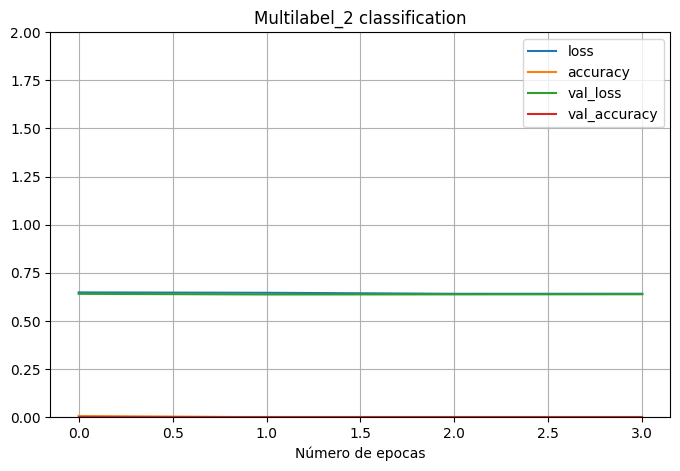

In [ ]:
pd.DataFrame(history_multilabel_2.history).plot(figsize=(8,5))
plt.grid(True)
plt.ylim(0,2)
plt.xlabel('Número de epocas')
plt.title('Multilabel_2 classification');

In [ ]:
dataset_path = '/content/Food101/food-101/images'
train_sz = 0.75
train_paths = []
test_paths = []

for dirname, _, filenames in os.walk(dataset_path):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        if np.random.rand() < train_sz:
            train_paths.append(path)
        else:
            test_paths.append(path)

print("Total paths:", len(train_paths) + len(test_paths))
print("Train paths:", len(train_paths))
print("Test paths:", len(test_paths))

Total paths: 506
Train paths: 391
Test paths: 115


In [ ]:
train_paths[-1]

'/content/Food101/food-101/images/pad_thai/1506021.jpg'

In [ ]:
import cv2 as cv
from keras.utils import img_to_array

In [ ]:
images = []
labels = []
dims = (240, 240, 3)

for filename in train_paths:
    img = cv.imread(filename)
    if img is None:
        print("Unable to read file:", filename)
        continue
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img = cv.resize(img, (240, 240))
    img = img_to_array(img)
    lbl = (os.path.sep)[-2].split("_")
    images.append(img)
    labels.append(lbl)

train_images = np.array(images, dtype="float") / 255.0
train_labels = np.array(labels)
